# **Trabalho Prático 1: Fraud Detection**
## Lara Gama Santos e Victor Samuel Levindo Mont'Mor



---

### 1. Leitura dos dados

Nessa etapa, precisamos fazer a leitura e análise dos dados. Temos as tabelas identity e transaction com uma relação de 1 para N, ou seja, uma identidade pode ter N transações. Para treinar o modelo, precisamos tratar esses dados. Dessa forma, aplicamos um Merge Left entre as tabelas, utilizando a chave `TransactionID` como união.

Algumas colunas (id) estão rotuladas incorretamente em test_identity, então tivemos que tratar os dados. Para isso, percorremos as colunas e aplicando a correção. 

In [12]:
import pandas as pd

# Carregar os dados de transação e identidade, e aplicar um merge para combinar os conjuntos de dados
df_train_transaction = pd.read_csv('data/train_transaction.csv')
df_train_identity = pd.read_csv('data/train_identity.csv')
df_train = df_train_transaction.merge(df_train_identity,on=['TransactionID'],how='left')
df_test_transaction = pd.read_csv('data/test_transaction.csv')
df_test_identity = pd.read_csv('data/test_identity.csv')

# Algumas colunas (id) estão rotuladas incorretamente em test_identity. Abaixo está a correção para isso
id_cols = [col for col in df_test_identity.columns if col[0]+col[1] == 'id']
rename_cols = {i:'id_'+str(i[-2]+i[-1]) for i in id_cols}
df_test_identity = df_test_identity.rename(columns=rename_cols)
df_test = df_test_transaction.merge(df_test_identity,on=['TransactionID'],how='left')
df_train.to_csv('data/train_combined.csv',index=False)
df_test.to_csv('data/test_combined.csv',index=False)

### 2. Análise exploratória de dados:

- Extrair variáveis importantes e deixar para trás variáveis inúteis.
- Identificar outliers, valores ausentes ou erros humanos.
- Compreender as relações, ou a falta dela, entre as variáveis.
- Maximizar seus insights sobre um conjunto de dados e minimizar potenciais erros que possam ocorrer mais tarde no processo.

Entendendo o dado:
- .shape retorna o número de linhas pelo número de colunas do meu conjunto de dados.
- .columns retorna o nome de todas as suas colunas no conjunto de dados.
- .head() retorna as primeiras 5 linhas do meu conjunto de dados. Isso é útil se você quiser ver alguns valores de exemplo para cada variável.
- .info() retorna o tipo das colunas e a quantidade de valores não nulos que temos nelas.
- .describe() resume a contagem, média, desvio padrão, mínimo e máximo para variáveis numéricas.

In [14]:
df_train = pd.read_csv('data/train_combined.csv')
# Para fins de teste rápido, amostramos 10% dos dados de treinamento
# df_train = df_train.sample(frac=0.1, random_state=42) # Comentar essa linha para usar o conjunto completo

# Salve o arquivo de uma planilha com 1% dos dados de treinamento para testes rápidos
# df_train.sample(frac=0.01, random_state=42).to_csv('data/train_sample_one_percent.csv', index=False) 

df_test = pd.read_csv('data/test_combined.csv')
print(df_train.shape)
print(df_test.shape)

(590540, 434)
(506691, 433)


Nossa tabela tem 590540 linhas e 434 colunas

In [9]:
print(df_train.columns)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


In [10]:
print(df_train.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   Na

In [11]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
None


In [6]:
df_train.describe()
# df_train['nome_da_coluna_categorica'].value_counts()
# NA_val = df_cleaned.isna().sum() # conta quantos nulos tem nas colunas

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


* Muitas Features: O conjunto de dados possui 434 colunas, o que é um número bem grande. Isso sugere que, no futuro, talvez precisemos de técnicas para selecionar as features mais importantes ou para reduzir a dimensionalidade.
* Valores Ausentes (Missing Values): Muitas colunas têm uma contagem de valores menor que o total de linhas (590.540), o que indica a presença de valores ausentes. Por exemplo, a coluna id_17 tem apenas 139.369 valores preenchidos. Lidar com esses valores ausentes será um passo crucial no pré-processamento dos dados.
* Dados Desbalanceados: A variável que queremos prever, isFraud, tem uma média de aproximadamente 0.035. Isso significa que apenas cerca de 3,5% das transações no conjunto de dados são fraudulentas. Este é um ponto muito importante, pois o desbalanceamento pode fazer com que o modelo de machine learning tenha uma tendência a prever que uma transação não é fraude, simplesmente porque essa é a classe majoritária.
* Diferentes Tipos e Escalas de Features: Existem features numéricas e categóricas (não numéricas). Além disso, as features numéricas estão em escalas muito diferentes. Por exemplo, TransactionAmt (valor da transação) chega a mais de 31.000, enquanto id_18 tem um valor máximo de 29. Será importante normalizar ou padronizar essas features.

#### 1. Análise de valores ausentes

In [ ]:
import numpy as np
import seaborn as sns

total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

#### 2. Visualização da distribuição da variável `isFraud`

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df_train)
plt.title('Distribuição da Variável isFraud')
plt.xlabel('isFraud')
plt.ylabel('Contagem')
plt.show()

#### 3. Exploração das features categóricas

In [ ]:
categorical_features = df_train.select_dtypes(include=['object']).columns
df_train[categorical_features].describe()

#### 4. Análise da correlação entre as features numéricas

In [ ]:
numerical_features = df_train.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df_train[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação de Features Numéricas')
plt.show()

### 3. Métrica de avaliação

O dataset escolhido apresenta dados reais de transações bancárias de e-commerce da empresa Vesta Corporation. O objetivo do desafio é, dada uma série de atributos, determinar se uma transação é ou não fraudulenta, para melhorar a eficácia de alertas de transações fraudulentas.

O modelo é avaliado com base na área embaixo da curva ROC (Receiver Operating Characteristic). Trata-se de uma métrica de classificação caracterizada pela relação entre positivos verdadeiros e positivos falsos.

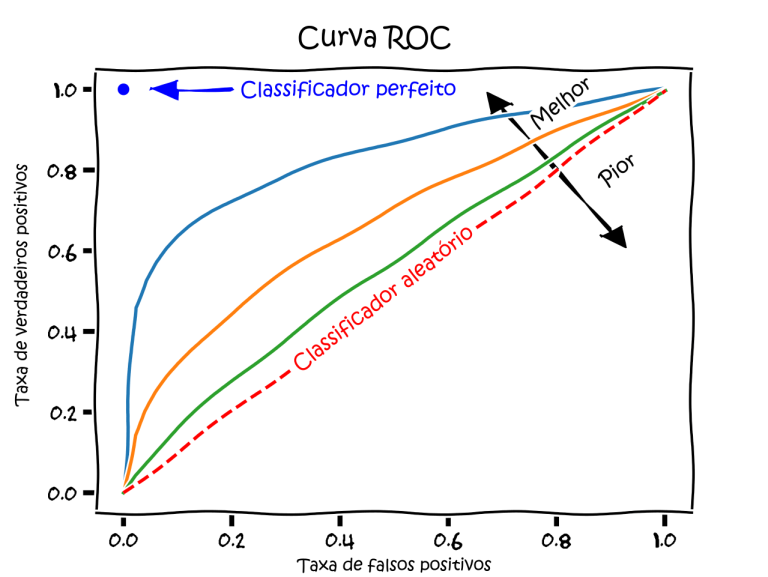

In [1]:
from IPython.display import Image, display
display(Image(filename="imgs\Curva-ROC.webp"))

A área embaixo da curva quantifica a capacidade do modelo de separar classes. Seu valor varia de 0 a 1, onde 1 indica uma classificação perfeita.

Essa métrica pode ser implementada em Python usando a função:

*roc_auc_score(y_test, y_pred_probs)*

(deixamos a implementação de fato para depois da construção do baseline, para que possamos avaliá-lo com base nas classificações geradas)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score 

# Cálculo das probabilidades
y_pred_probs = model.predict_proba(X_test)[:, 1] 

# A função roc_auc_score precisa dos valores verdadeiros e das probabilidades da classe positiva
auc = roc_auc_score(y_test, y_pred_probs)
print(f"A AUC do modelo é: {auc:.4f}")

# Calcular a Curva ROC para visualização
# A função roc_curve retorna três valores: taxas de falsos positivos,
# taxas de verdadeiros positivos e os limiares (thresholds) usados.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Visualizar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Modelo Aleatório') # Linha de referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 4. Baseline

Como baseline, decidimos implementar uma árvore de decisão com profundidade máxima baixa, para que execute rapidamente